In [7]:
20/0.5

40.0

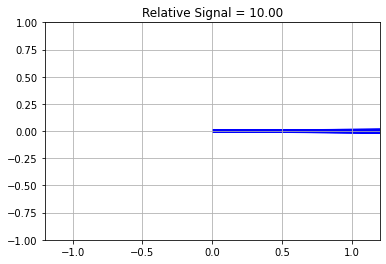

9.966301793852788
Phase Distribution = 0.02 radians, 1.19 degrees
Attenuation from phase distribution is: 0.9971430498867513


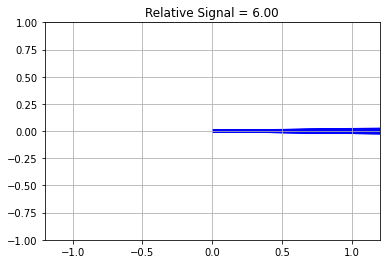

5.991226987311129
Phase Distribution = 0.03 radians, 1.93 degrees
Attenuation from phase distribution is: 0.9925776073433067


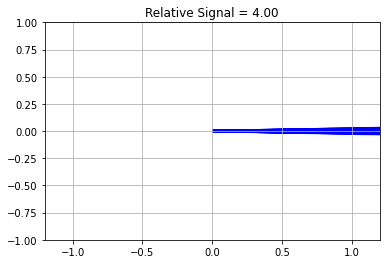

3.990457803878533
Phase Distribution = 0.05 radians, 2.72 degrees
Attenuation from phase distribution is: 0.9851931551807981


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the normal distribution
mean = 0
std_dev = 1

# Simulate bulk displacement
displacement_angle = 0

# Set diffusion strength (adjust as needed)
diffusion_strength = 0.0

# Capture 8 to 20 and then 2 SNR values for cardiac 
# Connect first figure and then colors couple sanity checks to do what you think it should do 
for magnitude_amplitude in [10,6,4]:
    signal_all = []
    angles = []
    for _ in range(1000):
        # Generate complex random noise
        num = 1000
        real_part = np.random.normal(mean, std_dev, size=num)
        imaginary_part = np.random.normal(mean, std_dev, size=num)
        
        # Combine real and imaginary parts to create complex numbers
        complex_noise = real_part + 1j * imaginary_part
        
        # Define Magnitude and Phase with bulk displacement
        phase = np.zeros((num))
        signal_with_displacement = magnitude_amplitude * np.ones((num)) * np.exp(1j * (phase + displacement_angle)) + complex_noise 
        
        # Add diffusion noise
        #diffusion_noise = np.random.normal(mean, diffusion_strength, size=100)
        #signal_with_diffusion = signal_with_displacement + diffusion_noise
        signal = signal_with_displacement
        # Calculate magnitude and angle after displacement and diffusion
        final_magnitude = np.abs(np.sum(signal) / num)
        final_angle = np.angle(np.mean(np.exp(1j * np.angle(signal))))

        # Plot the magnitude vector after displacement and diffusion
        plt.quiver(0, 0, final_magnitude * np.cos(final_angle), final_magnitude * np.sin(final_angle),
                angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)

        angles.append(final_angle)
        signal_all.append(signal)

    plt.title('Relative Signal = {:.2f}'.format(magnitude_amplitude))

    plt.xlim([-1.2, 1.2])
    plt.ylim([-1, 1])
    plt.grid(True)
    plt.show()
    print(abs(np.mean(np.array(signal)))/std_dev)
    all_phase_angles = np.array(angles)
    difference = np.min(all_phase_angles)
    difference = np.max(all_phase_angles) - np.min(all_phase_angles)
    print('Phase Distribution = {:.2f} radians, {:.2f} degrees'.format(difference,np.degrees(difference)))

    print('Attenuation from phase distribution is:', (abs(np.sinc((difference) *2*2/2))))




-0.03183878581951012

In [8]:
np.nanmean(mag

NameError: name 'mag_m0' is not defined